# **TASK & DATASET TO BE TRAINED**



*   **Customised Summarisation** :
 * *Customized summarization refers to the process of training a natural language processing (NLP) model to generate summaries of text content that are tailored to a specific domain, style, or purpose. Unlike generic summarization models that aim to provide a concise overview of any type of text, customized summarization focuses on producing summaries that align with the specific requirements and characteristics of a particular application or context and here main focus on replicating personalised summarisation*
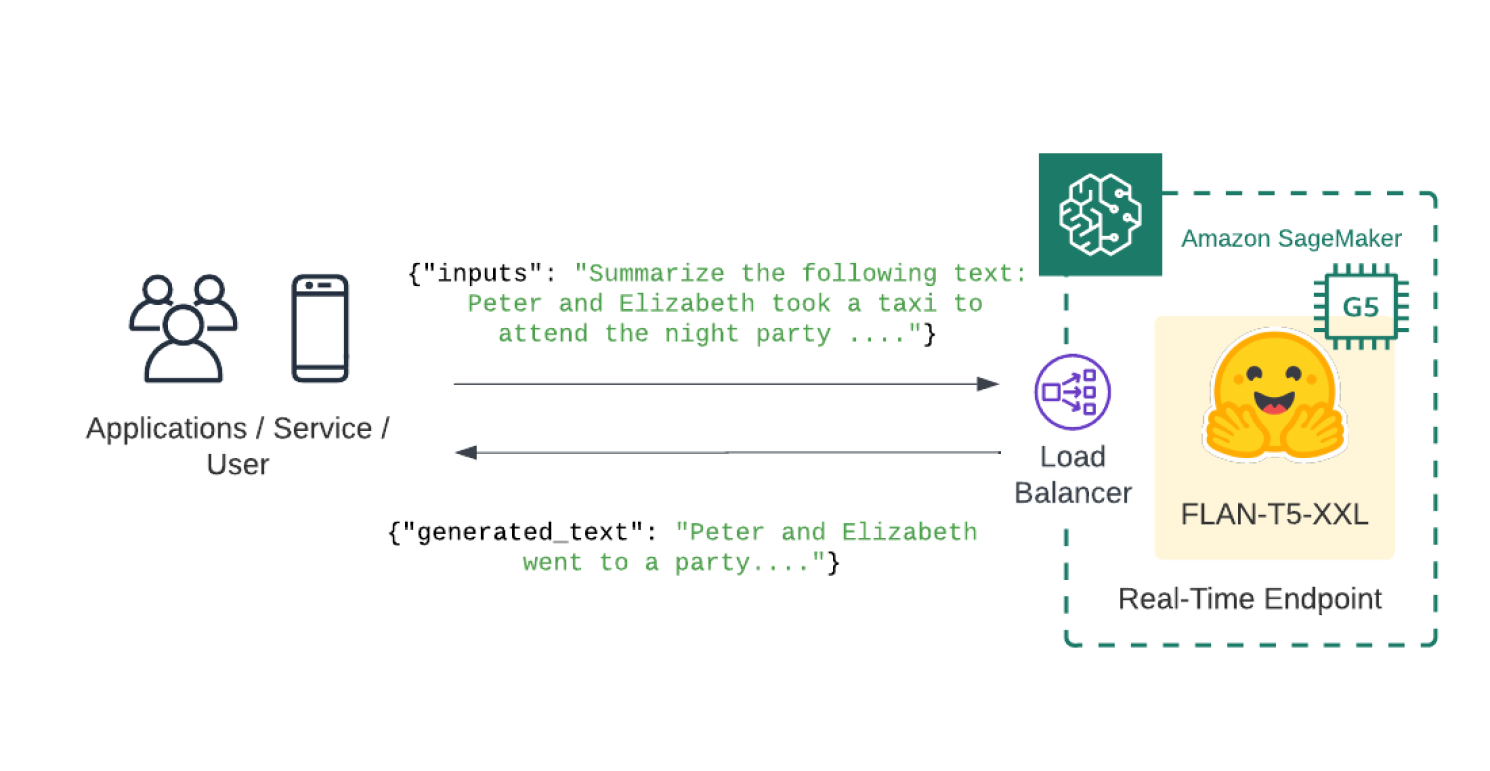

* **DataSet Chosen**
 * **SAMSum dataset from "Hugging-Face Dataset"**
  * *The SAMSum dataset contains about 16k messenger-like conversations with summaries. Conversations were created and written down by linguists fluent in English. Linguists were asked to create conversations similar to those they write on a daily basis, reflecting the proportion of topics of their real-life messenger convesations. The style and register are diversified - conversations could be informal, semi-formal or formal, they may contain slang words, emoticons and typos. Then, the conversations were annotated with summaries. It was assumed that summaries should be a concise brief of what people talked about in the conversation in third person.*

# **BASE MODEL USED : T5 MODEL**

* T5, which stands for "Text-To-Text Transfer Transformer," is a versatile and powerful transformer-based model developed by Google AI. It was designed with the concept that a wide range of NLP tasks can be framed as a text-to-text problem, where both the input and output are represented as text sequences. T5 has demonstrated remarkable performance across various natural language processing tasks by using a unified framework

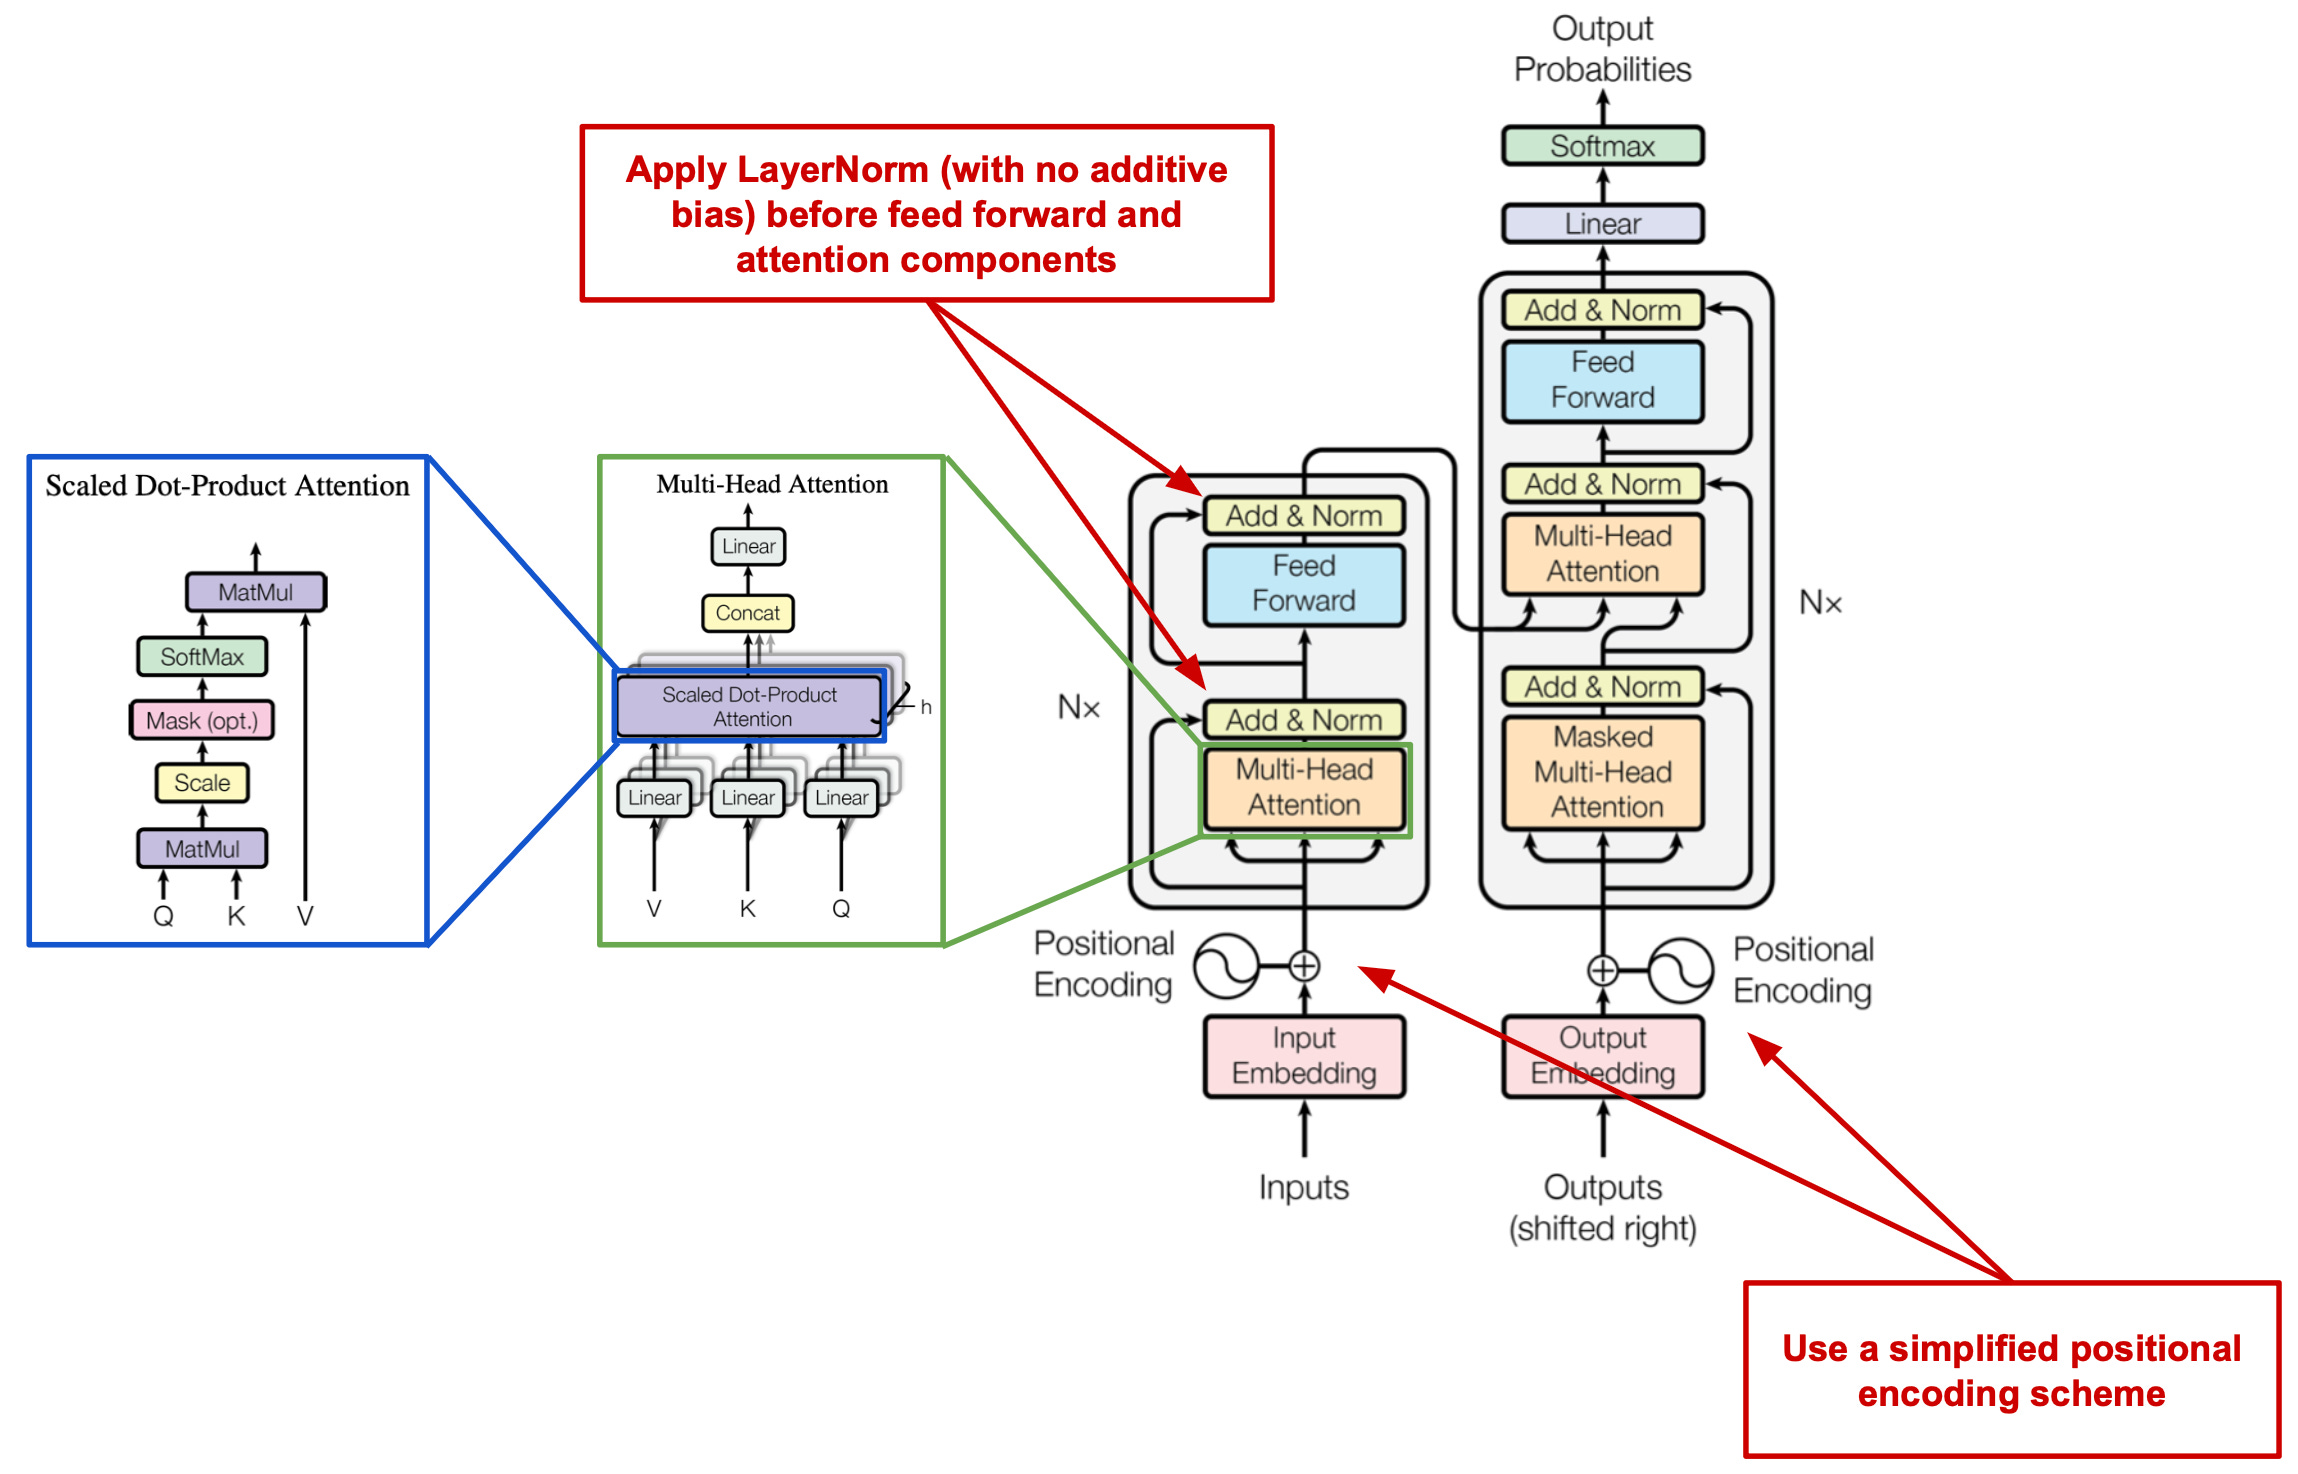

















In [ ]:
!nvidia-smi

Thu Aug 17 16:42:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install -q transformers accelerate sentencepiece gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.5 MB/s eta 0:00:0

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 595.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install py7zr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.6 MB/s eta 0:00:00


# **Importing the Dataset and Preprocessing**

In [ ]:
from datasets import load_dataset
dataset = load_dataset("samsum")

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
dataset['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
train_dataset = dataset['train']
val_dataset = dataset['test']

In [ ]:
from transformers import AutoTokenizer
import pandas as pd

import warnings
warnings.simplefilter('ignore')

tokenizer = AutoTokenizer.from_pretrained('t5-base')

#finding max length for each dialogue and its corresponding summary target
#for padding and truncatisation to same length of tokens (necessary for preprocessing and poositional vectors !!)

source_list = dataset['train']['dialogue'] + dataset['test']['dialogue']
source_text = pd.Series(source_list)

target_list = dataset['train']['summary'] + dataset['test']['summary']
target_text = pd.Series(target_list)

#initially tokenised without padding or truncation to get its max length for each domain
tokenized_source_text = tokenizer(list(source_text), truncation=False, padding=False)
tokenized_target_text = tokenizer(list(target_text), truncation=False, padding=False)

max_source = 0
for item in tokenized_source_text['input_ids']:
    if len(item) > max_source:
        max_source = len(item)

max_target = 0
for item in tokenized_target_text['input_ids']:
    if len(item) > max_target:
        max_target = len(item)

#after getting max_length lets do this padding and truncate stuff to this length
def tokenize(batch):
    tokenized_input = tokenizer(batch['dialogue'], padding='max_length', truncation=True, max_length=max_source)
    tokenized_label = tokenizer(batch['summary'], padding='max_length', truncation=True, max_length=max_target)

    tokenized_input['labels'] = tokenized_label['input_ids']

    return tokenized_input

#NOTE : Batch_size and batched = True is specified to map this set of bach instead of individually to make process effiecint and fast
train_dataset = train_dataset.map(tokenize, batched=True, batch_size=512)
val_dataset = val_dataset.map(tokenize, batched=True, batch_size=len(val_dataset))

Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

In [ ]:
train_dataset.set_format('numpy', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('numpy', columns=['input_ids', 'attention_mask', 'labels'])
pd.DataFrame(train_dataset)

,input_ids,attention_mask,labels
0,"[21542, 10, 27, 13635, 5081, 5, 531, 25, 241, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[21542, 13635, 5081, 11, 56, 830, 16637, 128, ..."
1,"[25051, 10, 2645, 33, 25, 10601, 21, 16, 48, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[25051, 11, 20373, 5144, 33, 10601, 21, 10215,..."
2,"[4485, 10, 2018, 6, 125, 31, 7, 95, 58, 6777, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6777, 164, 653, 8, 3, 17043, 7512, 32, 3317, ..."
3,"[8200, 10, 15868, 6, 27, 317, 27, 31, 51, 16, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[8200, 317, 7, 3, 88, 19, 16, 333, 28, 5377, 9..."
4,"[3084, 10, 3, 13133, 147, 88, 986, 3, 5206, 49...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3084, 19, 11319, 6, 250, 3, 88, 147, 88, 986,..."
...,...,...,...
14727,"[7332, 32, 10, 148, 33, 30, 82, 458, 24337, 25...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[7332, 32, 19, 1119, 12, 129, 7186, 17, 9, 12,..."
14728,"[290, 7, 9, 10, 3, 2, 11966, 834, 17720, 3155,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[290, 7, 9, 19, 44, 161, 5, 451, 2347, 339, 54..."
14729,"[1079, 10, 2181, 239, 128, 1282, 1506, 5, 3411...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3411, 19, 352, 12, 8069, 18214, 7, 541, 5, 28..."
14730,"[13560, 10, 19451, 205, 13240, 55, 571, 33, 25...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[205, 13240, 2654, 31, 17, 143, 34, 12, 8, 374..."


# **Training on T5-LLM Model** (Finally !!)
* While Using Trainer() API object an error occurs : *CUDA out of memory. Tried to allocate 488.00 MiB (GPU 0; 14.75 GiB total capacity; 13.56 GiB already allocated; 264.81 MiB free; 13.72 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF.*
* *So had to reduce batch size and also epochs for more faster process*


* *Though some hyperparameters could added or subtracted but decided to shift for pytorch approach.*
* But same problem persisted so hyperparameters were tuned to tackle this and finally trained by reduction in batch size though it took about 2 - 2.5 hrs to train

In [ ]:
from transformers import T5ForConditionalGeneration, Trainer, TrainingArguments

model = T5ForConditionalGeneration.from_pretrained('t5-base')

# #setting all the hyperparameters for training

# output_dir = '/content/drive/MyDrive/Colab Notebooks'

# training_args = TrainingArguments(
#     output_dir=output_dir,
#     num_train_epochs=3,  # Reduced from 5 for faster training
#     per_device_train_batch_size=2,  # Reduced from 3 to lower memory usage
#     per_device_eval_batch_size=2,   # Reduced from 3 to lower memory usage
#     eval_accumulation_steps=1,
#     prediction_loss_only=True,
#     learning_rate=5e-4,  # Slightly lower learning rate
#     evaluation_strategy='steps',
#     save_steps=1000,
#     save_total_limit=1,
#     remove_unused_columns=True,
#     run_name='run_name',
#     logging_steps=1000,
#     eval_steps=1000,
#     logging_first_step=False,
#     load_best_model_at_end=True,
#     metric_for_best_model="loss",
#     greater_is_better=False
# )



#evaluation criteria


#training using pytorch Trainer()

# trainer = Trainer(
#     model = model,
#     args = training_args,
#     train_dataset = train_dataset,
#     eval_dataset = val_dataset
# )

# trainer.train()

#wrapping dataset in dataloader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(val_dataset, batch_size=4)

#loss storing
losses = []

#initiating optimisers
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=0.001)

#specifying other hyperparameters
from transformers import get_scheduler
num_epochs = 5
num_training_steps = num_epochs * len(train_dataloader)

#initiating scheduler
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

#shifting to gpu
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# #training loop
# from tqdm.auto import tqdm

# progress_bar = tqdm(range(num_training_steps))

# model.train()
# for epoch in range(num_epochs):
#     for batch in train_dataloader:
#         batch = {k: v.to(device) for k, v in batch.items()}

#         #predicting output from model
#         outputs = model(**batch)

#         #calculating loss
#         loss = outputs.loss
#         losses.append(loss)

#         #backpropagation
#         loss.backward()
#         optimizer.step()
#         lr_scheduler.step()

#         #restarting the gradient
#         optimizer.zero_grad()

#         #for progress tracking
#         progress_bar.update(1)

# losses

#lets use more faster optimizer GradScaler than above AdamW

from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

# Inside the training loop
#training loop
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

for batch in train_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}

    with autocast():
        outputs = model(**batch)
        loss = outputs.loss
        losses.append(loss)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()
        lr_scheduler.step()
        progress_bar.update(1)

losses




  0%|          | 0/18415 [00:00<?, ?it/s]

[tensor(15.7904, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(19.6717, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(17.1678, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(16.8554, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(15.1064, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(5.7246, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.4205, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.6400, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.0989, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.1943, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.2179, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.3229, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.8992, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.2466, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.5671, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(0.9486, device='cuda:0', grad_fn=<NllLossBackward0>),
 te

In [ ]:

# After the training loop is complete
import numpy as np
progress_bar.close()
losses_flat = np.array([loss.item() for loss in losses])
len(losses_flat)


3683

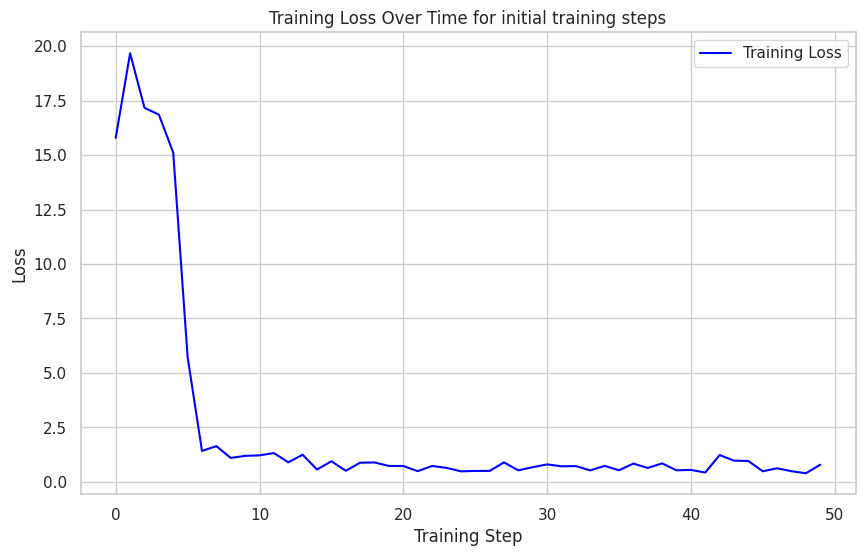

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting losses for initial step
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.plot(losses_flat[:50], label="Training Loss", color="blue")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Over Time for initial training steps")
plt.legend()
plt.show()

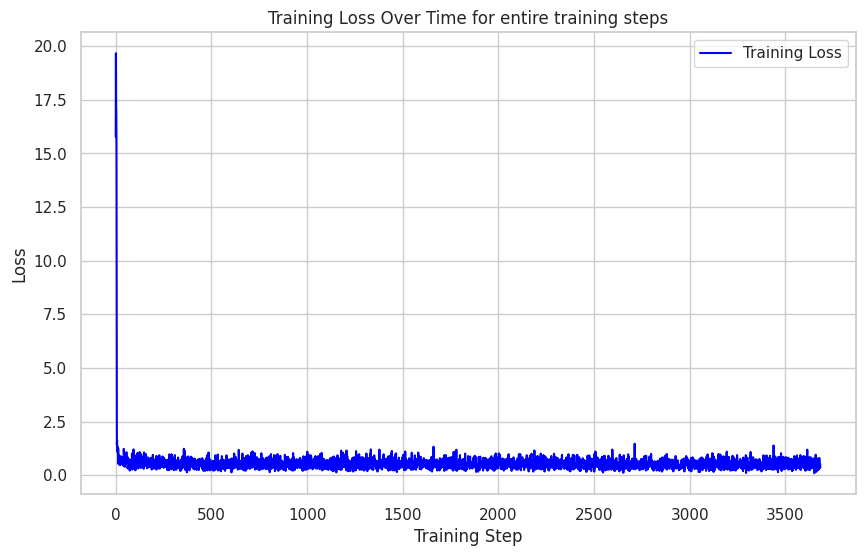

In [ ]:
# Plotting losses for entire iteration over dataset
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.plot(losses_flat, label="Training Loss", color="blue")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Over Time for entire training steps")
plt.legend()
plt.show()

# **Evaluation of our Model**

In [ ]:
# Initialize variables to keep track of correct predictions and total examples
total_correct = 0
total_examples = 0

model.eval()

for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # Calculate the number of correct predictions in this batch
    batch_correct = (predictions == batch["labels"]).sum().item()
    total_correct += batch_correct

    # Update the total number of examples
    total_examples += batch["labels"].size(0)

# Calculate accuracy
accuracy = total_correct / total_examples
print("Accuracy:", accuracy)


Accuracy: 83.77777777777777


In [ ]:
#but we are comparing text-to-text generation so we can just rely on comparing them then
#but see how similar they are in context also

#Cosine-Similarity is used here

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

model.eval()

similarity_scores = []

for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model.generate(**batch, max_length = 90)  # Adjust max_length as needed

    generated_summaries = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    reference_summaries = [tokenizer.decode(label, skip_special_tokens=True) for label in batch["labels"]]

    # Convert text to TF-IDF vectors for cosine similarity calculation
    tfidf_matrix = tfidf_vectorizer.fit_transform(generated_summaries)
    reference_tfidf_matrix = tfidf_vectorizer.transform(reference_summaries)

    # Calculate cosine similarity scores
    similarity = cosine_similarity(tfidf_matrix, reference_tfidf_matrix)
    similarity_scores.extend(similarity.diagonal())  # Extract diagonal values

average_similarity = np.mean(similarity_scores)
print("Average Cosine Similarity:", average_similarity)



Average Cosine Similarity: 0.6400989418106835


In [ ]:
#now we want ot see how similar or differ in their meaning of summary
#from output though summary's meaning may be little different but the sense or customisation of summary
#looks similar as if same linguist has created that summary but in differnt form

# Import necessary libraries and load your model, tokenizer, etc.

for batch_idx, batch in enumerate(eval_dataloader):
    if batch_idx >= 5:
        break  # Stop after processing 5 batches

    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model.generate(**batch, max_length=90)  # Adjust max_length as needed

    generated_summaries = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    reference_summaries = [tokenizer.decode(label, skip_special_tokens=True) for label in batch["labels"]]

    print({
        "generated_summary": generated_summaries,
        "reference_summary": reference_summaries
    })



{'generated_summary': ["Amanda is looking for Betty's number. She doesn't know him well.", 'Eric and Rob are watching a Russian stand-up. Eric and Rob are both impressed by the Russian stand-ups.', 'Lenny wants to buy a purple trousers. Bob advises her to choose the first or the third pair.', 'Emma is not hungry and will be home soon. Will will pick her up.'], 'reference_summary': ["Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.", 'Eric and Rob are going to watch a stand-up on youtube.', "Lenny can't decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob's advice to pick the trousers that are of best quality.", 'Emma will be home soon and she will let Will know.']}
{'generated_summary': ['Jane is in Warsaw. She has a problem with her phone. She will check on Friday if she can come to the party.', 'Hilary is meeting up with her friends at the entrance to the conference hall at 2 pm. She will go back to the apartment.', 'Pa

# **Final App or GUI Deployment of our Fine-Tuned Model Using Gradio**

In [ ]:
import gradio as gr

title = "Customised your Summarisation Process"

# Define the device
device = "cuda:0"  # Or "cuda:1", etc. depending on your setup

# The function that takes the text input and generates a text output
def process_input(text, max_length):
    input_ids = tokenizer.encode(text, return_tensors="pt").to(device)  # Move tensor to GPU
    generated_ids = model.generate(input_ids, max_length=max_length)
    generated_summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return generated_summary

model_gui = gr.Interface(
    fn=process_input,
    inputs=[gr.Textbox(lines=3, label="Input"), gr.Slider(minimum=10, maximum=80, label="Max Length")],
    outputs=gr.Textbox(lines=3, label="Customised Summary"),
    title=title,
)
model_gui.launch(debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>